In [1]:
import pandas as pd
# 从CSV文件中加载数据
data = pd.read_csv('旅游数据.csv')

# 查看数据集信息
data.head(20)

,年份,国内旅游总花费(亿元),国内游客(百万人次),人均国内生产总值(元),城镇居民国内旅游人均花费(元),农村居民国内旅游人均花费(元)
0,2018年,51278.3,5539,65534,1034.0,611.9
1,2017年,45660.8,5001,59592,1024.6,603.3
2,2016年,39389.8,4435,53783,1009.1,576.4
3,2015年,34195.1,3990,49922,985.5,554.2
4,2014年,30311.9,3611,46912,975.4,540.2
5,2013年,26276.1,3262,43497,946.6,518.9
6,2012年,22706.2,2957,39771,914.5,491.0
7,2011年,19305.4,2641,36277,877.8,471.4
8,2010年,12579.8,2103,30808,883.0,306.0
9,2009年,10183.7,1902,26180,801.1,295.3


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 选择特征和标签
X = data.drop(columns=['年份', '国内旅游总花费(亿元)'])
y = data['国内旅游总花费(亿元)']

# 创建并拟合线性回归模型
model = LinearRegression()
model.fit(X, y)

# 提取回归系数和截距
coef = model.coef_
intercept = model.intercept_

# 输出系数和截距
print("系数:", coef)
print("截距:", intercept)
print("模型评分:", model.score(X, y))

系数: [12.03054872 -0.16586633  7.49896735  6.07204074]
截距: -16037.079658497558
模型评分: 0.9999267076536533


findfont: Font family 'SimHeii' not found.
findfont: Font family 'SimHeii' not found.
/home/runner/code/.local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/runner/code/.local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/runner/code/.local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/runner/code/.local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/runner/code/.local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.

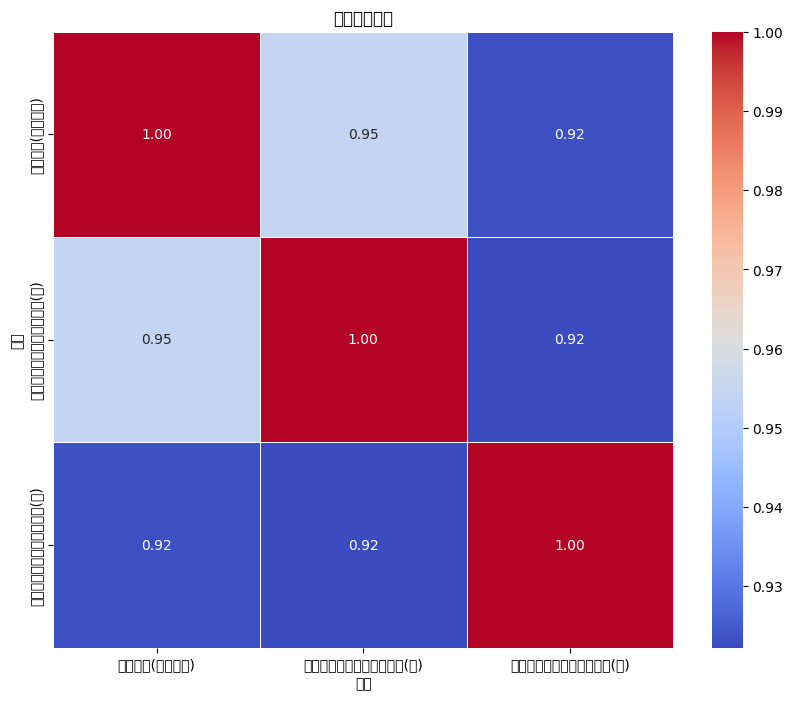

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import os
# 计算相关系数矩阵
corr_matrix = X.corr()

# 强制设置全局字体
plt.rcParams["font.family"] = ["SimHeii"]
plt.rcParams["axes.unicode_minus"] = False  # 修复负号显示

# 可视化相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('相关系数矩阵')
plt.xlabel('特征')
plt.ylabel('特征')
plt.show()


In [9]:
import statsmodels.api as sm

# 添加截距项
features = sm.add_constant(X)

# 进行多元线性回归
model = sm.OLS(y, features)
results = model.fit()
results.summary()

/home/runner/code/.local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            国内旅游总花费(亿元)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.662e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           7.63e-14
Time:                        11:34:47   Log-Likelihood:                -71.566
No. Observations:                  11   AIC:                             151.1
Df Residuals:                       7   BIC:                             152.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.492e+04   2150.029     -6.941      0.000      -2e+04   -9839.954
国内游客(百万人次)         10.6391      0.182     58.507      0.000      10.209      11.069
城镇居民国内旅游人均花费(元)     4.7574      2.990      1.591      0.156      -2.313      11.828
农村居民国内旅游人均花费(元)     3.9127      1.418      2.759      0.028       0.559       7.266
==============================================================================
Omnibus:                        0.703   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.261
Skew:                           0.355   Prob(JB):                        0.878
Kurtosis:                       2.746   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# 选择特征和标签
X = data.drop(columns=['年份', '国内旅游总花费(亿元)', '人均国内生产总值(元)'])
y = data['国内旅游总花费(亿元)']

# 创建并拟合线性回归模型
model = LinearRegression()
model.fit(X, y)

# 提取回归系数和截距
coef = model.coef_
intercept = model.intercept_

# 输出系数和截距
print("系数:", coef)
print("截距:", intercept)
print("模型评分:", model.score(X, y))

系数: [10.63914953  4.75738227  3.91271434]
截距: -14923.963648948415
模型评分: 0.9998596476769439
